# DSCI 100 Group Project Proposal [Group 17]

### Title here (Correlating Resting Blood Pressure, Resting ECG and Heart Disease Diagnosis?)

In [38]:
library(tidyverse)
library(tidymodels)

### Introduction

**Background Information**

In the United States and Canada, heart disease is one of the leading causes of death among most age, gender, and racial groups. There are many lifestyle risk factors and contributors to heart disease in a person, and it is a growing issue that requires further awareness and analysis to tackle. The question we would like to try to answer with our project is the following: Are abnormal resting blood pressure and resting ECG results able to predict a higher chance of diagnosis of heart disease?

**Attribute Info**

The ‘processed-cleveland.data’ dataset we will be using has data on the medical info of 303 patients, consisting of 14 attributes that are:
* age
* sex
* cp (chest pain type)
  * 1–typical angina
  * 2–atypical angina
  * 3–non-anginal pain
  * 4–asymptomatic
* trestbps (resting blood pressure on admission to hospital, in mmHg)
* chol (serum cholesterol, in mg/dl)
* fbs (fasting blood sugar > 120 mg/dl)
  * 1–true
  * 0–false
* restecg (resting electrocardiographic results)
  * 0–normal resting ECG
  * 1–ST-T wave abnormality
  * 2–probable/definite left ventricular hypertrophy by Estes’ criteria
* thalach (maximum heart rate)
* exang (exercise induced angina)
  * 1–true
  * 0–false
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of peak exercise ST segment)
  * 1–upsloping
  * 2–flat
  * 3–downsloping
* ca (number of major vessels colored by fluoroscopy)
* thal
  * 3–normal
  * 6–fixed defect
  * 7–reversible defect
* num (diagnosis of heart disease) (predicted value)
  * 0–**<50%** diameter narrowing
  * 1–**>50%** diameter narrowing
  
We have chosen to use ECG results as one of our main predictors due to its ability to show a variety of heart related information, such as if the patient has had a previous heart attack and/or high blood pressure.

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



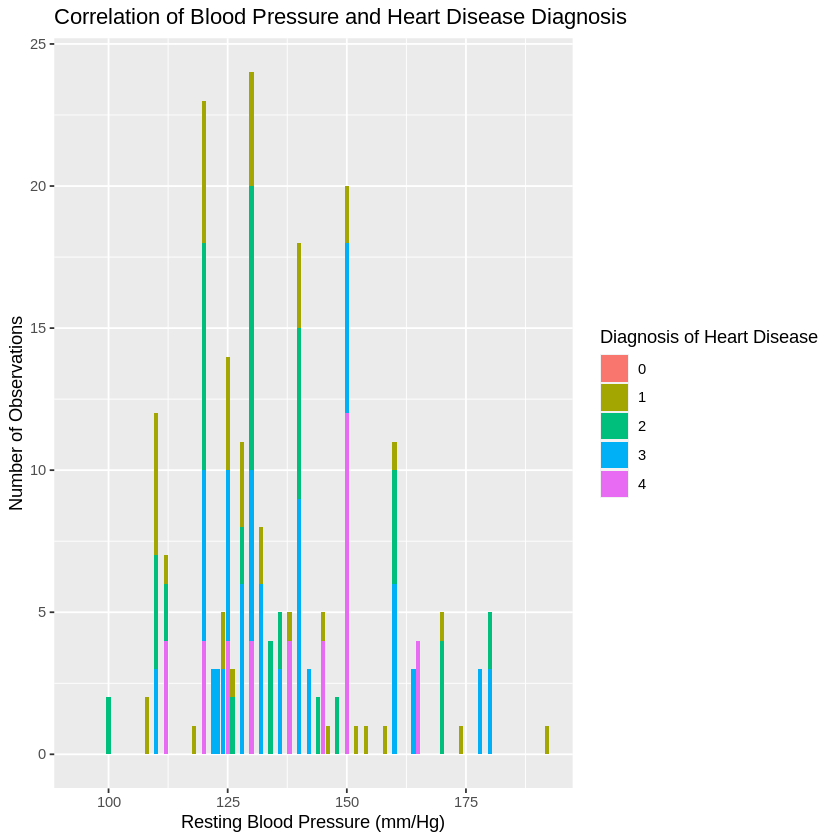

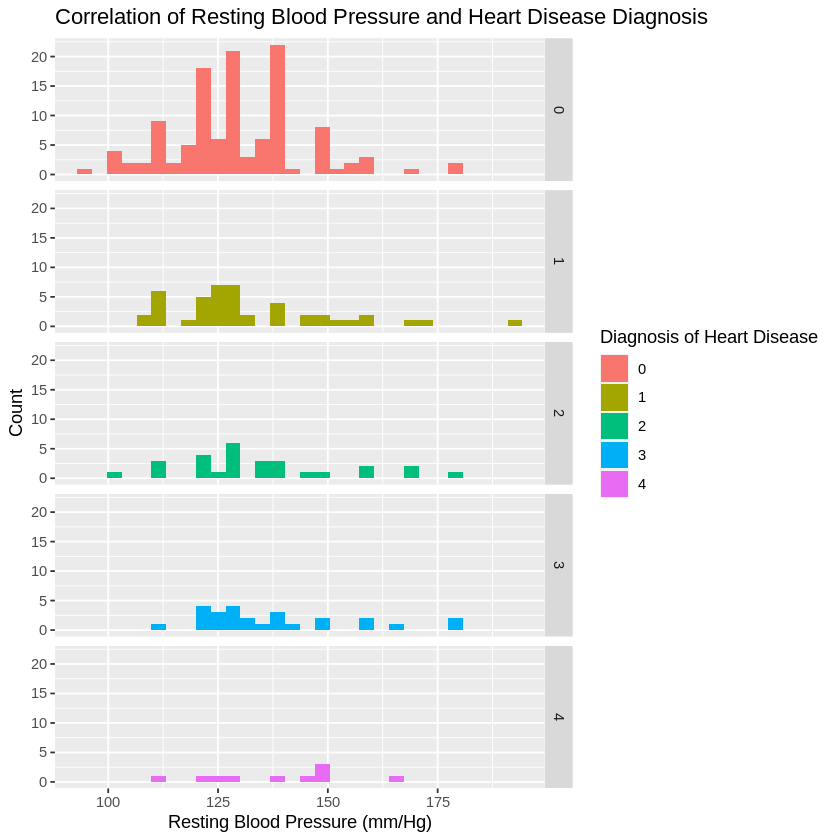

In [37]:
#prelim data analysis


data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

set.seed(87)
filtered <- data %>% select(trestbps, restecg, num)
#filtered
split <- initial_split(filtered, prop = 0.75, Strata = num)
train <- training(split)
test <- testing(split)
plot1 <- train %>%
        ggplot(aes(x=trestbps,y=num, fill = as_factor(num))) +
        geom_bar(stat="identity") +
        labs(x="Resting Blood Pressure (mm/Hg)", y = "Number of Observations", fill="Diagnosis of Heart Disease") +
        ggtitle("Correlation of Blood Pressure and Heart Disease Diagnosis")
plot1
plot2 <- train %>%
        ggplot(aes(x=trestbps, fill = as_factor(num))) +
        geom_histogram() +
        labs(x="Resting Blood Pressure (mm/Hg)", y = "Count", fill="Diagnosis of Heart Disease") +
        ggtitle("Correlation of Resting Blood Pressure and Heart Disease Diagnosis") +
        facet_grid(rows = vars(num))
plot2

### Methods

To conduct our data analysis we will firstly read in our dataset from the internet into R, then proceed to cleaning it up by adding variable titles to all 14 columns of the dataset (using col_names), and ensuring that within our data, only one value is in each cell, and each row and observation is a single observation and variable respectively. For our data analysis we will be using the variables “resting blood pressure (mm/Hg)”, “resting electrocardiograph results”, and “diagnosis of heart disease”. The first two of the listed variables were chosen to be analyzed in order to explore how these important heart-related test results of a patient can be used to predict the presence of heart disease. The last variable was chosen for our data analysis because it is the value that we are ultimately using to predict the presence of heart disease. These columns of data will be extracted using the “select” function in R.

### Exprected outcomes and significance

